In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [4]:
x, y = make_blobs(
    n_samples=40,
    centers=2,
    random_state=0
)

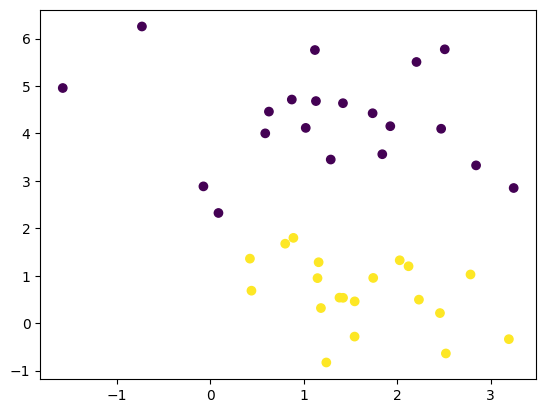

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [6]:
clf = LinearSVC(C=1)
clf.fit(x, y)
clf.score(x, y)

1.0

In [7]:
def decision_boundary_plot(X, y, clf):
    axis_x1_min, axis_x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    axis_x2_min, axis_x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    x1, x2 = np.meshgrid( np.arange(axis_x1_min,axis_x1_max, 0.01) , np.arange(axis_x2_min,axis_x2_max, 0.01))
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])

    plt.contourf(x1, x2, z, cmap=custom_cmap)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

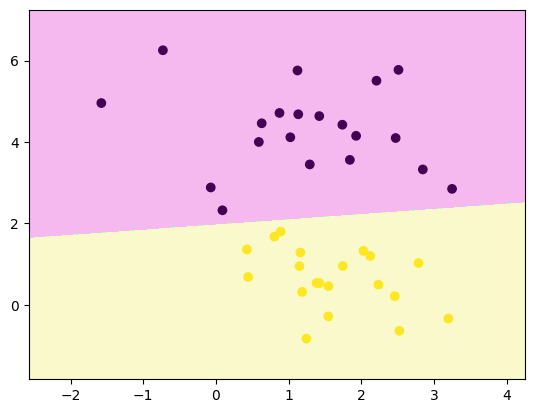

In [8]:
decision_boundary_plot(x, y, clf)

In [9]:
def plot_svm_margin(x, y, clf, ax = None):
    from sklearn.inspection import DecisionBoundaryDisplay
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        ax = ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(x[:,0], x[:,1], c = y)

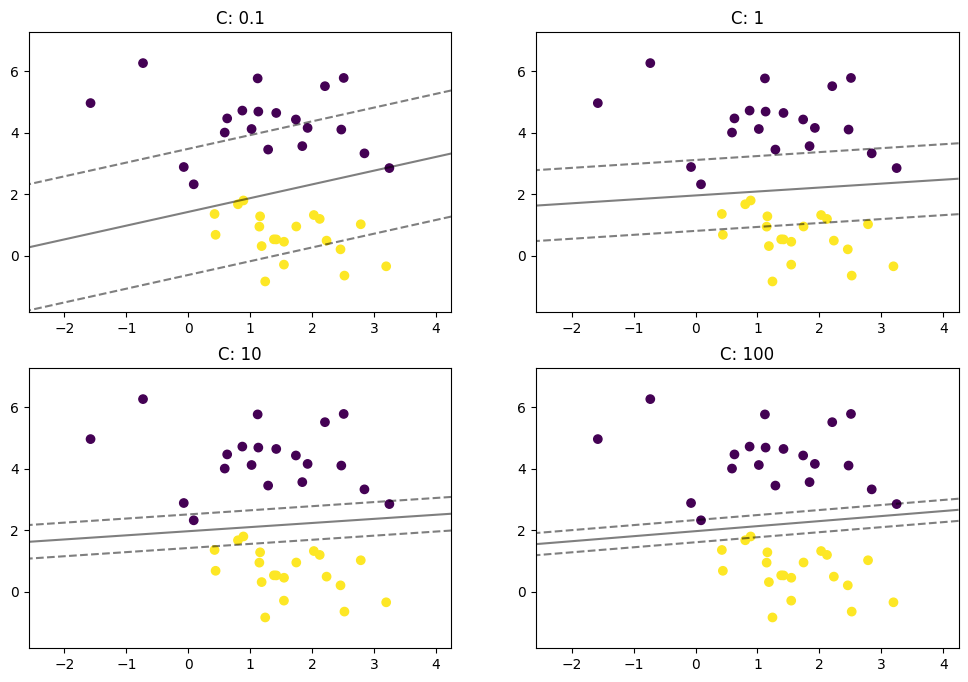

In [10]:
plt.rcParams['figure.figsize'] = (12, 8)
params = [0.1, 1, 10, 100]
for i, c in enumerate(params):
    clf = LinearSVC(C = c, random_state=0)
    clf.fit(x, y)

    ax = plt.subplot(2, 2, i + 1)
    plt.title("C: {0}".format(c))
    plot_svm_margin(x, y, clf, ax)

plt.show()

In [11]:
from sklearn.svm import LinearSVC

In [12]:
iris = load_iris()
x, y = iris.data, iris.target

In [13]:
clf = LinearSVC(C=0.01,multi_class='ovr', random_state=0)
clf.fit(x, y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,0.01
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,0


In [14]:
clf.score(x, y)

0.8133333333333334